In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_gt_HR = pd.read_csv("../../data_v3/hr_ground_truth.csv")
df_gt_PTP = pd.read_csv("../../data_v3/ptp_ground_truth.csv")

In [3]:
df_gt_HR

,activity_name,start,end,actual_end,overlapping_activities,bp_id,overlapping_bps,classification,Multi Class Classification,Single Class Classification,probability
0,GenerateJobApplicationActivity,17,356,325,[],1224,[],GenerateJobApplicationActivity,TRUE,True,0.994192
1,ResumeReviewActivity,356,1212,1192,[],1224,[],ResumeReviewActivity,TRUE,True,0.993149
2,GenerateJobApplicationActivity,1212,1582,1520,[],1225,[],GenerateJobApplicationActivity,TRUE,True,0.994192
3,ResumeReviewActivity,1582,2354,2336,[],1225,[],ResumeReviewActivity,TRUE,True,0.993329
4,GenerateJobApplicationActivity,2354,2708,2664,[],1226,[],GenerateJobApplicationActivity,TRUE,True,0.994192
5,ResumeReviewActivity,2708,4467,4461,['ScheduleAnInterviewActivityCall'],1226,[1255],"ResumeReviewActivity, ScheduleAnInterviewActiv...",TRUE,True,0.211112
6,ScheduleAnInterviewActivityCall,3057,4881,4871,"['ResumeReviewActivity', 'GenerateJobApplicati...",1225,"[1226,1227]","ResumeReviewActivity, ScheduleAnInterviewActiv...",TRUE,True,0.021792
7,GenerateJobApplicationActivity,4467,4939,4881,['ScheduleAnInterviewActivityCall'],1227,[1226],GenerateJobApplicationActivity,FALSE,True,0.986619
8,ResumeReviewActivity,4939,6205,6164,['PerformAnInterviewCall'],1227,[1225],ResumeReviewActivity,FALSE,True,0.839890
9,PerformAnInterviewCall,5606,6879,6859,['ResumeReviewActivity'],1225,[1227],PerformAnInterviewCall,FALSE,True,0.962106


In [4]:
df_gt_PTP

,activity_name,start,end,actual_end,overlapping_activities,bp_id,overlapping_bps,classification,Multi Class Classification,Single Class Classification,probability
0,CreatePurchaseRequest,96,1367,1322,[],399,[],NaN,NaN,NaN,NaN
1,CreateCallForTender,1367,1940,1887,[],399,[],NaN,NaN,NaN,NaN
2,CreatePurchaseRequest,1940,2818,2793,[],400,[],NaN,NaN,NaN,NaN
3,CreateRfq,2818,6289,15871,[],399,[],NaN,NaN,NaN,NaN
4,CreateCallForTender,5563,6178,5965,[],400,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
58,SubmitPayment,100724,104625,104454,[],406,[],NaN,NaN,NaN,NaN
59,CreatePurchaseOrder,101210,105998,105925,[],408,[],NaN,NaN,NaN,NaN
60,SubmitPayment,106266,108727,108703,[],407,[],NaN,NaN,NaN,NaN
61,ReceiveGoods,108727,109758,109696,[],408,[],NaN,NaN,NaN,NaN


In [5]:
df_gt_HR["bp_id_norm"] = df_gt_HR.groupby("bp_id").ngroup() +1

In [6]:
df_gt_HR.groupby("bp_id_norm").agg({"start": "min", "end": max})


/var/folders/qt/gt7q1tn978x_02pv47b2lrvm0000gn/T/ipykernel_4320/694249437.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_gt_HR.groupby("bp_id_norm").agg({"start": "min", "end": max})


,start,end
bp_id_norm,,
1,17,1212
2,1212,6879
3,2354,4467
4,4467,6205
5,6879,17273
6,8060,27226
7,10272,11974
8,13457,28384
9,15720,27306


/var/folders/qt/gt7q1tn978x_02pv47b2lrvm0000gn/T/ipykernel_4320/1436009193.py:7: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  res = df.groupby("bp_id_norm").agg({"start": "min", "end": max}).reset_index()
/var/folders/qt/gt7q1tn978x_02pv47b2lrvm0000gn/T/ipykernel_4320/1436009193.py:44: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  res = df.groupby("bp_id_norm").agg({"start": "min", "end": max}).reset_index()


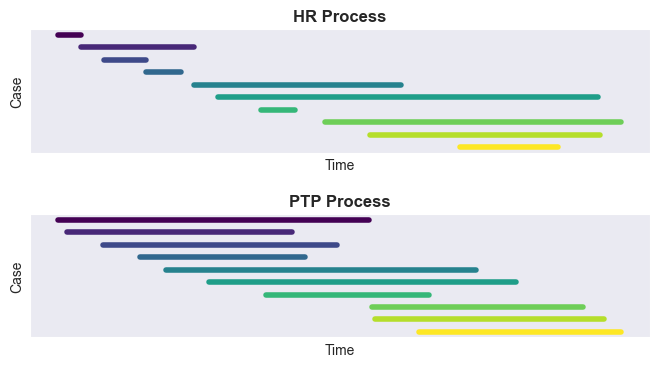

In [7]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

df = df_gt_HR

df["bp_id_norm"] = df.groupby("bp_id").ngroup() +1
res = df.groupby("bp_id_norm").agg({"start": "min", "end": max}).reset_index()

# Plotting
fig, axs = plt.subplots(2,1, figsize=(8,4),gridspec_kw={'hspace': 0.5})


cmap = plt.get_cmap('viridis')
norm= Normalize(vmin=res['bp_id_norm'].min(), vmax=res['bp_id_norm'].max())

# Plot horizontal lines for each ID
for index, row in res.iterrows():
    color = cmap(norm(row["bp_id_norm"]))
    axs[0].plot([row['start'], row['end']], [row['bp_id_norm'], row['bp_id_norm']], color=color, linewidth=4)

# Set labels and title
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Case')
axs[0].set_title('HR Process', fontweight='bold')

# Set ticks on y-axis to match IDs
axs[0].set_yticks(res['bp_id_norm'])
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].grid(False)


axs[0].invert_yaxis()
# Show plot


from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize


df = df_gt_PTP

df["bp_id_norm"] = df.groupby("bp_id").ngroup() +1
res = df.groupby("bp_id_norm").agg({"start": "min", "end": max}).reset_index()


cmap = plt.get_cmap('viridis')
norm = Normalize(vmin=res['bp_id_norm'].min(), vmax=res['bp_id_norm'].max())

# Plot horizontal lines for each ID
for index, row in res.iterrows():
    color = cmap(norm(row["bp_id_norm"]))
    axs[1].plot([row['start'], row['end']], [row['bp_id_norm'], row['bp_id_norm']], color=color, linewidth=4)

# Set labels and title
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Case')
axs[1].set_title('PTP Process', fontweight='bold')

# Set ticks on y-axis to match IDs
axs[1].set_yticks(res['bp_id_norm'])
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].grid(False)


axs[1].invert_yaxis()

plt.savefig("../../output/interleaved.png", dpi = 300,bbox_inches='tight')
# Show plot
plt.show()

In [8]:
cmap = plt.get_cmap('viridis')
norm = Normalize(vmin=0, vmax=7)

In [9]:
for i in range(8):
    print(f"\definecolor{{vir{i}}}{{rgb}}{{{cmap(norm(i))[0]},{cmap(norm(i))[1]},{cmap(norm(i))[2]}}}")

\definecolor{vir0}{rgb}{0.267004,0.004874,0.329415}
\definecolor{vir1}{rgb}{0.275191,0.194905,0.496005}
\definecolor{vir2}{rgb}{0.212395,0.359683,0.55171}
\definecolor{vir3}{rgb}{0.153364,0.497,0.557724}
\definecolor{vir4}{rgb}{0.122312,0.633153,0.530398}
\definecolor{vir5}{rgb}{0.288921,0.758394,0.428426}
\definecolor{vir6}{rgb}{0.626579,0.854645,0.223353}
\definecolor{vir7}{rgb}{0.993248,0.906157,0.143936}


In [10]:
cmap(norm(0.7))

(0.282623, 0.140926, 0.457517, 1.0)

In [11]:
import ast
from event_loop.preprocessing.dataframe import pre_process

df_train_in_HR = pd.read_csv('../../data_v3/hr_extended_features.csv', converters={"MessageAttributes": ast.literal_eval})
df_train_in_PTP = pd.read_csv('../../data/VALID/R1/R1.csv', converters={"MessageAttributes": ast.literal_eval})
df_train_HR = pre_process(df_train_in_HR)
df_train_PTP = pre_process(df_train_in_PTP)

In [12]:
hr_raw = pd.read_csv("../../data/TRAIN/R1/R1.csv")

# Descriptive Data Analysis

In [13]:
# Events per Instance
df_train_HR.groupby("InstanceNumber").size().mean()

132.292

Events per Instance

In [14]:
df_train_in_PTP.groupby("InstanceNumber").size().mean()

48119.149253731346

In [15]:
df_train_in_PTP.groupby("InstanceNumber").size().std()

10644.204902560305

In [16]:
hr_raw.groupby("InstanceNumber").size().mean()

6424.728

In [17]:
hr_raw.groupby("InstanceNumber").size().std()

4578.813346344076

Events per Activity

In [18]:
print("PTP_Raw Case Level",df_train_in_PTP.groupby(["InstanceNumber"]).size().mean(),"+-",df_train_in_PTP.groupby(["InstanceNumber"]).size().std())

PTP_Raw Case Level 48119.149253731346 +- 10644.204902560305


In [19]:
print("PTP_Raw Activity Level",df_train_in_PTP.groupby(["InstanceNumber","BusinessActivity"]).size().mean(),"+-",df_train_in_PTP.groupby(["InstanceNumber","BusinessActivity"]).size().std())

PTP_Raw Activity Level 6773.073529411765 +- 9005.485252471228


In [20]:
print("HR_Raw Case Level",hr_raw.groupby(["InstanceNumber"]).size().mean(),"+-",hr_raw.groupby(["InstanceNumber",]).size().std())

HR_Raw Case Level 6424.728 +- 4578.813346344076


In [21]:
print("HR_Raw Activity Level",hr_raw.groupby(["InstanceNumber","BusinessActivity"]).size().mean(),"+-",hr_raw.groupby(["InstanceNumber","BusinessActivity"]).size().std())

HR_Raw Activity Level 1721.524115755627 +- 921.1206453273526


In [22]:
hr_raw.groupby(["InstanceNumber","BusinessActivity"]).size().mean()

1721.524115755627

In [23]:
hr_raw.groupby(["InstanceNumber","BusinessActivity"]).size().std()

921.1206453273526

In [24]:
df_train_PTP.groupby(["InstanceNumber"]).size().mean()

402.3134328358209

In [25]:
df_train_PTP.groupby(["InstanceNumber","BusinessActivity"]).size().mean()

65.90464547677261

In [26]:
df_train_HR.groupby(["InstanceNumber"]).size().mean()

132.292

In [27]:
df_train_HR.groupby(["InstanceNumber","BusinessActivity"]).size().mean()

35.448017148981776

In [28]:
hr_raw["BusinessActivity"].value_counts()

BusinessActivity
ResumeReviewActivity               458690
ScheduleAnInterviewMeeting         264982
ScheduleAnInterviewActivityCall    255832
PerformAnInterviewMeeting          205968
PerformAnInterviewCall             188943
GenerateJobApplicationActivity     140032
ContractProposal                    91735
Name: count, dtype: int64

In [29]:
df_train_in_PTP["BusinessActivity"].value_counts()

BusinessActivity
CreateRfq                1805307
CreatePurchaseOrder       540783
SubmitPayment             304507
CreatePurchaseRequest     181031
ReceiveGoods              122491
BidSelection              110564
CreateCallForTender       110204
VendorResponse             49096
Name: count, dtype: int64

In [30]:
hr_raw[(hr_raw["InstanceNumber"]==10 )]

,Unnamed: 0,FileName,BusinessActivity,InstanceNumber,synthetic_sniff_time,synthetic_sniff_time_str,session_generalized,HighestLayerProtocol,MessageType_WithRole,MessageType,MessageAttributes
1255,1255,GenerateJobApplicationActivity_10.pcap,GenerateJobApplicationActivity,10,2020-05-12 23:28:06.769654,2020-05-12 23:28:06.769654,192.168.11.1-192.168.11.2 (1),pgsql,Odoo Application->db Server/Mail Server:[Pgsql...,PgsqlRequest:Simple query,"{'pgsql.type': 'Simple query', 'pgsql.length':..."
1256,1256,GenerateJobApplicationActivity_10.pcap,GenerateJobApplicationActivity,10,2020-05-12 23:28:09.559933,2020-05-12 23:28:09.559933,192.168.11.1-192.168.11.2 (1),pgsql,db Server/Mail Server->Odoo Application:[Pgsql...,PgsqlResponse:Parameter status,"{'pgsql.type': 'Parameter status', 'pgsql.leng..."
1257,1257,GenerateJobApplicationActivity_10.pcap,GenerateJobApplicationActivity,10,2020-05-12 23:28:09.559933,2020-05-12 23:28:09.559933,192.168.11.1-192.168.11.2 (1),pgsql,db Server/Mail Server->Odoo Application:[Pgsql...,PgsqlResponse:Parameter status,"{'pgsql.type': 'Parameter status', 'pgsql.leng..."
1258,1258,GenerateJobApplicationActivity_10.pcap,GenerateJobApplicationActivity,10,2020-05-12 23:28:09.559933,2020-05-12 23:28:09.559933,192.168.11.1-192.168.11.2 (1),pgsql,db Server/Mail Server->Odoo Application:[Pgsql...,PgsqlResponse:Command completion,"{'pgsql.type': 'Command completion', 'pgsql.le..."
1259,1259,GenerateJobApplicationActivity_10.pcap,GenerateJobApplicationActivity,10,2020-05-12 23:28:09.559933,2020-05-12 23:28:09.559933,192.168.11.1-192.168.11.2 (1),pgsql,db Server/Mail Server->Odoo Application:[Pgsql...,PgsqlResponse:Ready for query,"{'pgsql.type': 'Ready for query', 'pgsql.lengt..."
...,...,...,...,...,...,...,...,...,...,...,...
144110,144110,ResumeReviewActivity_10.pcap,ResumeReviewActivity,10,2020-05-13 16:34:01.934501,2020-05-13 16:34:01.934501,192.168.11.1-192.168.11.2 (4),pgsql,db Server/Mail Server->Odoo Application:[Pgsql...,PgsqlResponse:Command completion,"{'pgsql.type': 'Command completion', 'pgsql.le..."
144111,144111,ResumeReviewActivity_10.pcap,ResumeReviewActivity,10,2020-05-13 16:34:01.934501,2020-05-13 16:34:01.934501,192.168.11.1-192.168.11.2 (4),pgsql,db Server/Mail Server->Odoo Application:[Pgsql...,PgsqlResponse:Parameter status,"{'pgsql.type': 'Parameter status', 'pgsql.leng..."
144112,144112,ResumeReviewActivity_10.pcap,ResumeReviewActivity,10,2020-05-13 16:34:01.934501,2020-05-13 16:34:01.934501,192.168.11.1-192.168.11.2 (4),pgsql,db Server/Mail Server->Odoo Application:[Pgsql...,PgsqlResponse:Ready for query,"{'pgsql.type': 'Ready for query', 'pgsql.lengt..."
144113,144113,ResumeReviewActivity_10.pcap,ResumeReviewActivity,10,2020-05-13 16:34:09.285236,2020-05-13 16:34:09.285236,192.168.11.2-192.168.11.6 (5),http,Odoo Application->End Point (HR Manager):[Http...,HttpResponse:HTTP/1.0 200 OK\r\n,"{'': 'HTTP/1.0 200 OK\\r\\n', '_ws.expert': 'E..."


In [31]:
hr_raw[hr_raw["MessageAttributes"].astype("str").str.contains("smtp")]

,Unnamed: 0,FileName,BusinessActivity,InstanceNumber,synthetic_sniff_time,synthetic_sniff_time_str,session_generalized,HighestLayerProtocol,MessageType_WithRole,MessageType,MessageAttributes
141516,141516,ResumeReviewActivity_1.pcap,ResumeReviewActivity,1,2020-05-13 17:19:55.685358,2020-05-13 17:19:55.685358,192.168.11.1-192.168.11.2 (7),pgsql,Odoo Application->db Server/Mail Server:[Pgsql...,PgsqlRequest:Simple query,"{'pgsql.type': 'Simple query', 'pgsql.length':..."
141523,141523,ResumeReviewActivity_1.pcap,ResumeReviewActivity,1,2020-05-13 17:22:33.651153,2020-05-13 17:22:33.651153,192.168.11.1-192.168.11.2 (8),smtp,db Server/Mail Server->Odoo Application:[SmtpR...,SmtpResponse:220,"{'smtp.rsp': '1', 'smtp.response': '220 DC1.bp..."
141524,141524,ResumeReviewActivity_1.pcap,ResumeReviewActivity,1,2020-05-13 19:55:25.538250,2020-05-13 19:55:25.538250,192.168.11.1-192.168.11.2 (8),smtp,Odoo Application->db Server/Mail Server:[SmtpR...,SmtpRequest:ehlo,"{'smtp.req': '1', 'smtp.command_line': 'ehlo B..."
141525,141525,ResumeReviewActivity_1.pcap,ResumeReviewActivity,1,2020-05-13 20:02:44.332125,2020-05-13 20:02:44.332125,192.168.11.1-192.168.11.2 (8),smtp,db Server/Mail Server->Odoo Application:[SmtpR...,SmtpResponse:250,"{'smtp.rsp': '1', 'smtp.response': '250-DC1.bp..."
141586,141586,ResumeReviewActivity_1.pcap,ResumeReviewActivity,1,2020-05-13 20:31:54.187093,2020-05-13 20:31:54.187093,192.168.11.1-192.168.11.2 (8),smtp,Odoo Application->db Server/Mail Server:[SmtpR...,SmtpRequest:mail,"{'smtp.req': '1', 'smtp.command_line': 'mail F..."
...,...,...,...,...,...,...,...,...,...,...,...
1605501,1605501,ContractProposal_94.pcap,ContractProposal,94,2020-05-14 20:53:16.872913,2020-05-14 20:53:16.872913,192.168.11.1-192.168.11.2 (13),smtp,db Server/Mail Server->Odoo Application:[SmtpR...,SmtpResponse:354,"{'smtp.rsp': '1', 'smtp.response': '354 Start ..."
1605507,1605507,ContractProposal_94.pcap,ContractProposal,94,2020-05-14 20:53:20.143240,2020-05-14 20:53:20.143240,192.168.11.1-192.168.11.2 (13),smtp,Odoo Application->db Server/Mail Server:[SmtpR...,SmtpReassembledMessage,"{'smtp.eom': 'C: .', 'smtp.data.fragments': '6..."
1605508,1605508,ContractProposal_94.pcap,ContractProposal,94,2020-05-14 20:53:50.176243,2020-05-14 20:53:50.176243,192.168.11.1-192.168.11.2 (13),smtp,db Server/Mail Server->Odoo Application:[SmtpR...,SmtpResponse:250,"{'smtp.rsp': '1', 'smtp.response': '250 2.6.0 ..."
1606054,1606054,ContractProposal_94.pcap,ContractProposal,94,2020-05-14 20:56:42.473471,2020-05-14 20:56:42.473471,192.168.11.1-192.168.11.2 (13),smtp,Odoo Application->db Server/Mail Server:[SmtpR...,SmtpRequest:quit,"{'smtp.req': '1', 'smtp.command_line': 'quit\\..."


In [32]:
hr_raw[hr_raw["synthetic_sniff_time"] == "2020-05-13 15:05:14.384424"]

,Unnamed: 0,FileName,BusinessActivity,InstanceNumber,synthetic_sniff_time,synthetic_sniff_time_str,session_generalized,HighestLayerProtocol,MessageType_WithRole,MessageType,MessageAttributes
599460,599460,ScheduleAnInterviewActivityCall_1.pcap,ScheduleAnInterviewActivityCall,1,2020-05-13 15:05:14.384424,2020-05-13 15:05:14.384424,192.168.11.2-192.168.11.6 (6),http,End Point (HR Manager)->Odoo Application:[Http...,HttpRequest:POST /xmlrpc/2/object HTTP/1.1\r\n,"{'': 'POST /xmlrpc/2/object HTTP/1.1\\r\\n', '..."


In [33]:
hr_raw.loc[599460]["MessageAttributes"]

'{\'\': \'POST /xmlrpc/2/object HTTP/1.1\\\\r\\\\n\', \'_ws.expert\': \'Expert Info (Chat/Sequence): POST /xmlrpc/2/object HTTP/1.1\\\\r\\\\n\', \'http.chat\': \'POST /xmlrpc/2/object HTTP/1.1\\\\r\\\\n\', \'_ws.expert.message\': \'POST /xmlrpc/2/object HTTP/1.1\\\\r\\\\n\', \'_ws.expert.severity\': \'2097152\', \'_ws.expert.group\': \'33554432\', \'http.request.method\': \'POST\', \'http.request.uri\': \'/xmlrpc/2/object\', \'http.request.version\': \'HTTP/1.1\', \'http.host\': \'192.168.11.2:8069\', \'http.request.line\': \'Host: 192.168.11.2:8069\\\\xd\\\\xa\', \'http.accept_encoding\': \'gzip\', \'http.content_type\': \'text/xml\', \'http.user_agent\': \'Python-xmlrpc/3.7\', \'http.content_length_header\': \'1030\', \'http.content_length\': \'1030\', \'http.request.full_uri\': \'http://192.168.11.2:8069/xmlrpc/2/object\', \'http.request\': \'1\', \'http.request_number\': \'1\', \'http.file_data\': "<?xml version=\'1.0\'?>\\\\xa<methodCall>\\\\xa<methodName>execute_kw</methodName>\\

In [34]:
df_train_HR[df_train_HR["InstanceNumber"] == 1]

,BusinessActivity,InstanceNumber,frame.number,sniff_time,synthetic_sniff_time,event_with_roles,request_method_call,file_data,pgsql.query,pgsql.target,selective_file_data,origin_method,origin_file_data
0,GenerateJobApplicationActivity,1,26,2020-05-12 09:57:23.762710,2020-05-13 10:07:18.092710,End Point (HR Manager)->Odoo Application:[Http...,version,[],,,version,,
1,GenerateJobApplicationActivity,1,127,2020-05-12 09:57:28.092427,2020-05-13 22:08:59.592427,Odoo Application->End Point (HR Manager):[Http...,server_version,"[server_version, 12.0-20190820, server_version...",,,server_version,version,version
2,GenerateJobApplicationActivity,1,135,2020-05-12 09:57:28.094494,2020-05-13 22:09:20.264494,End Point (HR Manager)->Odoo Application:[Http...,authenticate,"[odoo01, dana.wireless@gmail.com, 123456789]",,,,,
3,GenerateJobApplicationActivity,1,192,2020-05-12 09:57:28.580005,2020-05-13 23:30:15.860005,Odoo Application->db Server/Mail Server:[Pgsql...,,,"INSERT INTO ""res_users_log"" (""id"", ""create_uid...",res_users_log,,,
4,GenerateJobApplicationActivity,1,216,2020-05-12 09:57:28.729685,2020-05-13 23:55:12.809685,Odoo Application->End Point (HR Manager):[Http...,IsNumber,[6],,,IsNumber,authenticate,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,PerformAnInterviewMeeting,1,1155,2020-05-12 09:59:44.998939,2020-05-13 16:00:02.168939,Odoo Application->db Server/Mail Server:[Pgsql...,,,"UPDATE ""mail_message_res_partner_needaction_re...",mail_message_res_partner_needaction_rel,,,
213,PerformAnInterviewMeeting,1,1192,2020-05-12 09:59:45.013079,2020-05-13 16:02:23.583079,Odoo Application->End Point (Recruiting manage...,IsNumber,[1],,,IsNumber,execute_kw,hr.applicant_write_stage_id_8
214,PerformAnInterviewMeeting,1,1200,2020-05-12 09:59:45.014595,2020-05-13 16:02:38.744595,End Point (Recruiting manager)->Odoo Applicati...,execute_kw,"[odoo01, 7, 123456789, hr.applicant, archive_a...",,,hr.applicant_archive_applicant,,
215,PerformAnInterviewMeeting,1,1266,2020-05-12 09:59:45.068763,2020-05-13 16:11:40.478763,Odoo Application->db Server/Mail Server:[Pgsql...,,,"UPDATE ""hr_applicant"" SET ""active""=false,""writ...",hr_applicant,,,


In [35]:
df_train_HR.loc[74]["file_data"]

''

In [36]:
df_train_HR.loc[76]["pgsql.query"]

'UPDATE "mail_activity" SET "res_name"=\'Software Engineer\',"write_uid"=1,"write_date"=(now() at time zone \'UTC\') WHERE id IN (410)'

In [38]:
df_train_PTP["event_with_roles"].value_counts()

event_with_roles
Odoo Application->db Server/Mail Server:[PgsqlRequest:Simple query]: UPDATE: purchase_order          2825
Odoo Application->db Server/Mail Server:[PgsqlRequest:Simple query]: INSERT: mail_message            2117
Odoo Application->db Server/Mail Server:[PgsqlRequest:Simple query]: UPDATE: purchase_order_line     2069
Odoo Application->db Server/Mail Server:[PgsqlRequest:Simple query]: INSERT: mail_tracking_value     2050
Odoo Application->End Point (Procurement):[HttpResponse:HTTP/1.0 200 OK\r\n]                         1625
                                                                                                     ... 
Odoo Application->db Server/Mail Server:[PgsqlRequest:Simple query]: INSERT: account_payment           47
Odoo Application->db Server/Mail Server:[PgsqlRequest:Simple query]: UPDATE: product_product           26
Odoo Application->db Server/Mail Server:[PgsqlRequest:Simple query]: INSERT: product_supplierinfo      26
Odoo Application->db Server/M